In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# read in the training set file

train_raw = pd.read_csv('train.csv')
train_raw.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [3]:
train_raw.info()
# there are 370 features to predict the target


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [88]:
train_raw.groupby('TARGET').size() 

TARGET
0    73012
1     3008
dtype: int64

The "TARGET" column is the variable to predict. It equals 1 for unsatisfied customers and 0 for satisfied customers. We don't have information on what each feature variable actually means or refers to. There are 3008 out of 73012 dissatisfied customers, or
only 4%.<p>
This problem is almost an outlier identification problem, as the dissatisfied customers could be considered outliers

In [11]:
summary = train_raw.describe() # descriptive statistics of all variables
summary.iloc[:,20:31]

,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0
count,76020.000000,76020.000000,76020.0,76020.0,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000
mean,0.011458,0.003762,0.0,0.0,0.958024,0.663760,0.000105,0.000026,0.032833,0.028598,0.067522
std,0.106425,0.061221,0.0,0.0,0.200535,0.472425,0.010258,0.005129,0.178202,0.166674,0.250925
min,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.0,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.0,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


It looks like all of the predictor variables are continuous. Some of them have hidden NA values, such as "-999999" as a minimum value of var3. It could also be that certain categorical varables were mistaken as continuous. If a variable has only a handful of unique vales and they are all integers ordered in a sequence, it would be very likely to be a categorical or ordered variable.

In [8]:
# apply a function to each column that counts the total number of unique values
var_uniq = train_raw.apply(lambda x : np.unique(x).size, axis = 0)
var_uniq[:50]

ID                         76020
var3                         208
var15                        100
imp_ent_var16_ult1           596
imp_op_var39_comer_ult1     7551
imp_op_var39_comer_ult3     9099
imp_op_var40_comer_ult1      293
imp_op_var40_comer_ult3      346
imp_op_var40_efect_ult1       23
imp_op_var40_efect_ult3       29
imp_op_var40_ult1            224
imp_op_var41_comer_ult1     7421
imp_op_var41_comer_ult3     8961
imp_op_var41_efect_ult1      331
imp_op_var41_efect_ult3      454
imp_op_var41_ult1           8032
imp_op_var39_efect_ult1      336
imp_op_var39_efect_ult3      462
imp_op_var39_ult1           8149
imp_sal_var16_ult1            66
ind_var1_0                     2
ind_var1                       2
ind_var2_0                     1
ind_var2                       1
ind_var5_0                     2
ind_var5                       2
ind_var6_0                     2
ind_var6                       2
ind_var8_0                     2
ind_var8                       2
ind_var12_

First, check the histogram to see the distribution of unique value size among feature variables.
<ul>
    <li>When there are over 100 unique values, it is very likely that the variabel is continuous.</li>
  <li>When there are 2 unique values, it is very likely a binary or dummy variable.</li>
  <li>When there is only 1 unique value, this variable could be discarded.</li>
</ul>
 

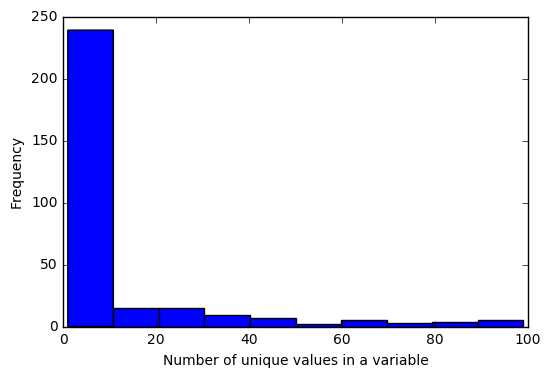

In [19]:
plt.hist(var_uniq[var_uniq<100])
plt.xlabel('Number of unique values in a variable')
plt.ylabel('Frequency')
plt.show()

It looks like there are about 65% of the features with less than 10 unique values. Let's take a closer look at variables with 10 unique values or less.

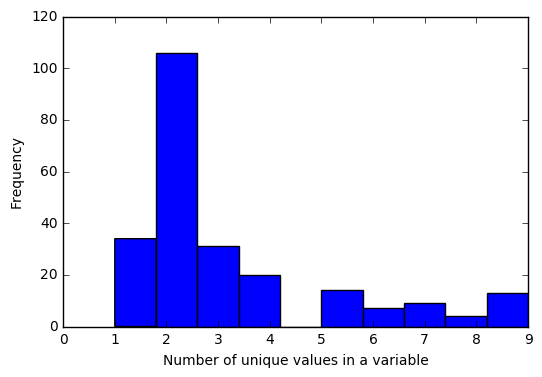

In [20]:
plt.hist(var_uniq[var_uniq<10])
plt.xlabel('Number of unique values in a variable')
plt.ylabel('Frequency')
plt.show()

In [27]:
# print out the unique values of variables that had only 2 unique values
train_raw.loc[:,var_uniq==2].apply(lambda x: print(np.unique(x)), axis= 0)

[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  3.]
[ 0.  3.]
[ 0.  3.]
[ 0.  3.]
[ 0.  3.]
[ 0.  3.]
[ 0.  3.]
[ 0.  3.]
[ 0.  3.]
[ 0.  3.]
[ 0.  3.]
[ 0.  3.]
[ 0.  3.]
[ 0.  3.]
[ 0.  3.]
[ 0.  3.]
[  0.00000000e+00   1.00000000e+10]
[  0.00000000e+00   1.00000000e+10]
[  0.00000000e+00   1.00000000e+10]
[  0.00000000e+00   1.00000000e+10]
[  0.00000000e+00   1.00000000e+10]
[  0.00000000e+00   1.00000000e+10]
[  0.00000000e+00   1.00000000e+10]
[  0.000

ind_var1_0                       None
ind_var1                         None
ind_var5_0                       None
ind_var5                         None
ind_var6_0                       None
ind_var6                         None
ind_var8_0                       None
ind_var8                         None
ind_var12_0                      None
ind_var12                        None
ind_var13_0                      None
ind_var13_corto_0                None
ind_var13_corto                  None
ind_var13_largo_0                None
ind_var13_largo                  None
ind_var13_medio_0                None
ind_var13_medio                  None
ind_var13                        None
ind_var14_0                      None
ind_var14                        None
ind_var17_0                      None
ind_var17                        None
ind_var18_0                      None
ind_var18                        None
ind_var19                        None
ind_var20_0                      None
ind_var20   

All those features that have 2 unique values have 0 as one of the two values. Some features had 1 as the other value, but others have ranging from 3 to 145.2, 1200, 12027.15. Those features would have a misleading mean and standard deviation value. Their scale may also misleading our modele results. 
Even if they were indeed continuous variables, they could be converted into dummy variables encoded as {1: having a value of 'X', 0: not having a value of 'x'}.

In [74]:
# print out the unique values of variables that had only 3 unique values
train_raw.loc[:,var_uniq==3].apply(lambda x: print(np.unique(x)), axis= 0)

[ 0.  3.  6.]
[ 0.  3.  6.]
[ 0.  3.  6.]
[ 0.  3.  6.]
[ 0.  3.  6.]
[ 0.  3.  6.]
[ 0.  3.  6.]
[ 0.  3.  6.]
[ 0.  3.  6.]
[     0.   11976.6  19531.8]
[     0.   9000.  30000.]
[       0.   300000.  3000000.]
[     0.   11976.6  19531.8]
[     0.  15000.  36000.]
[ -1.00000000e+00   0.00000000e+00   1.00000000e+10]
[ -1.00000000e+00   0.00000000e+00   1.00000000e+10]
[ -1.00000000e+00   0.00000000e+00   1.00000000e+10]
[ -1.00000000e+00   0.00000000e+00   1.00000000e+10]
[ -1.00000000e+00   0.00000000e+00   1.00000000e+10]
[ -1.00000000e+00   0.00000000e+00   1.00000000e+10]
[     0.     1883.22  15691.8 ]
[    0.     276.24  1096.02]
[     0.    45741.48  96781.44]
[ 0.  3.  6.]
[ 0.  1.  2.]
[ 0.  3.  6.]
[ 0.  3.  6.]
[ 0.  3.  6.]
[    0.    5586.21  7741.95]
[     0.   9000.  30000.]
[     0.     7293.12  18870.99]


num_var1_0                       None
num_var1                         None
num_var8_0                       None
num_var13_corto_0                None
num_var13_corto                  None
num_var24                        None
num_var33                        None
num_var40_0                      None
num_var44_0                      None
saldo_var6                       None
saldo_var13_medio                None
saldo_var18                      None
saldo_var29                      None
saldo_var34                      None
delta_imp_reemb_var17_1y3        None
delta_imp_trasp_var17_in_1y3     None
delta_imp_trasp_var33_in_1y3     None
delta_num_reemb_var17_1y3        None
delta_num_trasp_var17_in_1y3     None
delta_num_trasp_var33_in_1y3     None
imp_amort_var18_ult1             None
imp_amort_var34_ult1             None
imp_trasp_var17_in_hace3         None
num_aport_var33_ult1             None
num_meses_var29_ult3             None
num_trasp_var17_in_hace3         None
num_trasp_va

In [124]:
# print out the unique values of variables that had only 3 to 10 unique values
temp_3_10 = train_raw.loc[:,(var_uniq>2) & (var_uniq <21)]
for i in range(temp_3_10.shape[1]):
    print(list(temp_3_10.columns)[i], np.unique(temp_3_10.iloc[:,i]))

num_var1_0 [0 3 6]
num_var1 [0 3 6]
num_var4 [0 1 2 3 4 5 6 7]
num_var5_0 [ 0  3  6  9 15]
num_var5 [ 0  3  6  9 15]
num_var8_0 [0 3 6]
num_var12_0 [  0   3   6   9  15 111]
num_var12 [ 0  3  6 15]
num_var13_0 [ 0  3  6  9 12 15 18]
num_var13_corto_0 [0 3 6]
num_var13_corto [0 3 6]
num_var13_largo_0 [ 0  3  6  9 12 15 18]
num_var13_largo [ 0  3  6  9 12 15 18]
num_var13 [ 0  3  6  9 12 15 18]
num_var14_0 [  0   3   6  12 111]
num_var14 [ 0  3  6 12]
num_var17_0 [ 0  3  6  9 12 15 18 21 24 27 36]
num_var17 [ 0  3  6  9 12 15 18 21 27]
num_var24_0 [0 3 6 9]
num_var24 [0 3 6]
num_var26_0 [ 0  3  6  9 12 15 21 27 33]
num_var26 [ 0  3  6  9 12 15 21 27 33]
num_var25_0 [ 0  3  6  9 12 15 21 27 33]
num_var25 [ 0  3  6  9 12 15 21 27 33]
num_op_var40_hace2 [  0   3   6   9  12  15  18  21  24  27  30  42  45  51  54  72  81  96
 117]
num_op_var40_hace3 [ 0  3  6  9 48]
num_var30_0 [  0   3   6   9  12  15  18  21  24  33 114]
num_var30 [ 0  3  6  9 12 15 18 21 33]
num_var31_0 [ 0  3  6  9 12 1

<ul>
<li>It seems that many of those variables are ordered categorical variables, with '99' representing missing values, such as 'var36': [ 0  1  2  3 99]. </li>
<li> Some features are evenly spread but with large values. It is again hard to interpret like
<p>saldo_var18 [      0  300000 3000000]</p>
saldo_var29 [     0.   11976.6  19531.8]</li>
<li>It's much harder to make sense of some vairables with a wide range like 'num_var12_0': [  0   3   6   9  15 111]. And it's unclear whether '111' was an outlier or not</li>
<li> Quite a few of the 'delta' variables have values like 'delta_imp_reemb_var17_1y3': [        -1          0 9999999999]</li>
<li>The relationships between variables with almost the same name but different ending could be very important. <p>For instance, </p>
     num_var13_0: [ 0  3  6  9 12 15 18]
     <p>num_var13_corto_0: [0 3 6]</p>
     <p>num_var13_corto: [0 3 6]</p>
     <p>num_var13_largo_0: [ 0  3  6  9 12 15 18]</p>
     <p>num_var13_largo: [ 0  3  6  9 12 15 18]</p>
    <p></p>
</li>
<li> It could be that the features with '_0' have more values than the ones without, like <p>num_var17_0: [ 0  3  6  9 12 15 18 21 24 27 36]</p>
num_var17: [ 0  3  6  9 12 15 18 21 27]
<p> num_var33_0: [ 0  3  6 12]</p>
num_var33: [0 3 6]
</ul>

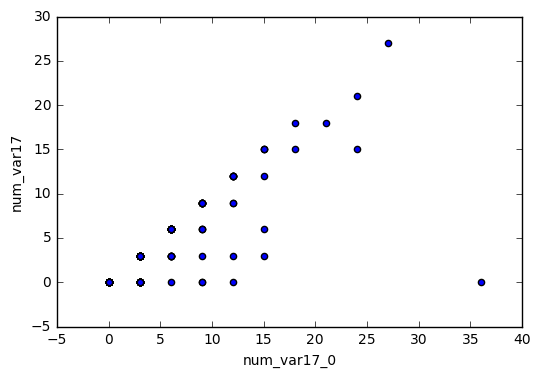

In [77]:
plt.scatter(train_raw.num_var17_0, train_raw.num_var17),
plt.xlabel('num_var17_0')
plt.ylabel('num_var17')
plt.show()

In [80]:
train_raw.groupby(['num_var17_0','num_var17']).size()
# compare the diffrences of two features

num_var17_0  num_var17
0            0            75883
3            0               22
             3               46
6            0                1
             3                6
             6               24
9            0                2
             3                1
             6                3
             9                9
12           0                1
             3                1
             9                2
             12               6
15           3                1
             6                1
             12               1
             15               3
18           15               1
             18               1
21           18               1
24           15               1
             21               1
27           27               1
36           0                1
dtype: int64

According to the scatter plot above, it seems that even though those two variables are highly correlated, there are still many observations with different values.
And the table shows that the vast majority of observations have "0" in both two features.
<p></p>
'0' is the minimum value of most variables. If the vast majority of a variable has zero value, it may be that a survey question asked whether a custom had a certain experience x, and 0 would imply that he/she didn't have it, and the other values would imply a customers' satisfaction level of their experience.

In [12]:
summary.loc['min',var_uniq > 20].sort_values()
# see the minimum value of a "continuous" variable

var3                        -999999.00
saldo_var8                    -4942.26
saldo_var30                   -4942.26
saldo_var42                   -4942.26
saldo_medio_var8_ult1         -3401.34
saldo_var5                    -2895.72
saldo_medio_var8_ult3         -1844.52
saldo_medio_var5_ult1          -922.38
saldo_medio_var5_ult3          -476.07
saldo_medio_var8_hace2         -287.67
saldo_medio_var5_hace2         -128.37
saldo_medio_var5_hace3           -8.04
delta_imp_aport_var13_1y3        -1.00
saldo_var1                       -0.90
saldo_var40                      -0.90
saldo_medio_var17_hace2          -0.03
num_var43_emit_ult1               0.00
num_var43_recib_ult1              0.00
num_op_var39_efect_ult1           0.00
num_op_var39_efect_ult3           0.00
imp_var7_recib_ult1               0.00
num_op_var41_efect_ult1           0.00
num_op_var41_comer_ult3           0.00
num_op_var40_comer_ult3           0.00
num_op_var40_comer_ult1           0.00
num_op_var39_comer_ult3  

It seems that the vast majority of predictor variables have "0" as the mean value. However, it is unknown what 0 means and also what positive or negative vlaues mean.

In [17]:
train_raw.groupby(train_raw.saldo_var8).size()
# it seems that the values are highly spread and bimodal

saldo_var8
-4942.26          1
-2994.93          1
-1802.01          1
-1774.80          1
-843.39           1
-798.48           1
-325.41           1
-306.57           1
-234.81           1
-95.70            1
-80.37            1
-72.81            1
-31.77            1
-30.96            1
-19.05            1
-10.14            1
-9.48             1
-4.17             1
-3.90             1
 0.00         73846
 0.03             2
 0.06             2
 0.18             1
 0.21             1
 0.27             1
 0.33             2
 0.36             1
 0.42             2
 0.60             3
 0.69             1
              ...  
 39851.28         1
 43363.23         1
 44650.17         1
 46519.08         1
 49135.89         1
 49247.82         1
 51013.74         1
 52180.44         1
 54217.92         1
 56959.98         1
 57569.37         1
 58847.37         1
 60098.49         1
 64385.34         1
 65611.32         1
 70501.71         1
 85194.06         1
 89262.00         1
 89381.61

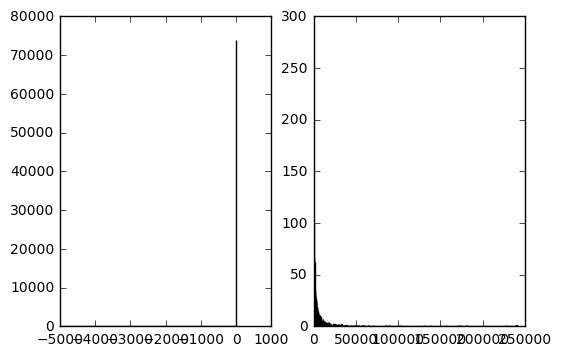

In [20]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
ax1.hist(train_raw.saldo_var8[train_raw.saldo_var8<10],bins= 2000)
ax2.hist(train_raw.saldo_var8[train_raw.saldo_var8>10],bins= 2000)
plt.show()

In [22]:
train_raw.groupby('num_var43_emit_ult1').size()
# another seemly continuous variable with vast majority of values being zero

num_var43_emit_ult1
0      70958
3       2984
6       1071
9        457
12       223
15       108
18        66
21        45
24        24
27        22
30         9
33        16
36         7
39         3
42         5
45         6
48         1
51         3
54         1
57         2
60         3
66         1
69         1
75         1
84         1
102        1
180        1
dtype: int64

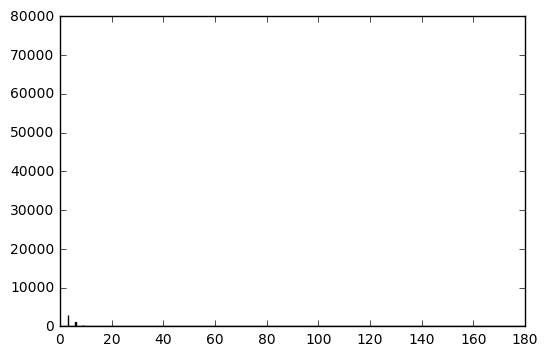

In [21]:
plt.hist(train_raw.num_var43_emit_ult1,bins=2000)
plt.show()

In [27]:
# compute the number of zeros in all numeric variables
(train_raw == 0).astype(int).sum(axis=0)[var_uniq > 20].sort_values()

ID                             0
var15                          0
var38                          0
var3                          75
saldo_var30                20310
saldo_var42                21786
saldo_medio_var5_hace2     23241
saldo_medio_var5_ult3      24664
saldo_medio_var5_ult1      24664
saldo_var5                 25561
saldo_medio_var5_hace3     29637
num_var45_ult3             38356
num_var45_hace2            48881
num_var22_ult3             49954
num_var45_hace3            50663
num_med_var45_ult3         51408
num_var45_ult1             54392
num_var22_hace2            60541
num_op_var39_ult3          62244
num_op_var41_ult3          62355
imp_op_var39_ult1          64271
num_op_var39_ult1          64271
num_op_var39_comer_ult3    64330
imp_op_var39_comer_ult3    64330
num_op_var41_ult1          64388
imp_op_var41_ult1          64388
imp_op_var41_comer_ult3    64480
num_op_var41_comer_ult3    64480
imp_op_var39_comer_ult1    66075
num_op_var39_comer_ult1    66075
          

Only three varaibles have a relatively small number of "0", and the rest of the features have 20K+ or over 26% of observations being zero. And the remaining 100 of those numerical predictor variables (> 20 unique values) have 60K+ observations with zero values, which is 79% of the sample size.

### Replace missing values with np.nan

In [10]:
# see the unique values of var3 
# double check that -999999 represents missing values

sorted(train_raw.var3.unique())

[-999999,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 38,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 68,
 69,
 71,
 72,
 73,
 74,
 76,
 77,
 78,
 79,
 81,
 82,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 110,
 111,
 112,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 156,
 157,
 158,
 159,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,


In [96]:
muted = train_raw.copy()

In [97]:
muted.var3 = muted.var3.replace(-999999, np.nan)

In [98]:
muted.var36 = muted.var36.replace(99, np.nan)

In [99]:
muted = muted.set_index(["ID"]) # set the ID column as row name
muted = muted.drop('TARGET', axis = 1)
muted.iloc[:3,-3:]

,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
ID,,,
1,0.0,0.0,39205.17
3,0.0,0.0,49278.03
4,0.0,0.0,67333.77


### Reshape 'categorical variables' into binary formats and scale numeric variables


In [104]:
for field in list(muted.columns):
    
    n_uniq = np.unique(muted[field]).size # get the number of unique values
    if n_uniq == 1:
        muted = muted.drop(field,axis = 1) # drop fields with only 1 unique value,m,,,,,,
     
    if n_uniq > 2 and n_uniq <21:
        # consider the column as a categorical variable
        muted = pd.concat([muted, pd.get_dummies(muted[field], prefix=field)], axis=1)
        muted = muted.drop(field, axis=1) # remove the original feature
    print(field, ': ', n_uniq)
    # Standarize numerical features
    #if n_uniq >= 21:
    #    mean, std = muted[field].mean(), muted[field].std()
    #    muted.loc[:,field] = (muted[field]-mean)/std
        # normalize feature to Normal(0,1)

var3 :  323
var15 :  100
imp_ent_var16_ult1 :  596
imp_op_var39_comer_ult1 :  7551
imp_op_var39_comer_ult3 :  9099
imp_op_var40_comer_ult1 :  293
imp_op_var40_comer_ult3 :  346
imp_op_var40_efect_ult1 :  23
imp_op_var40_efect_ult3 :  29
imp_op_var40_ult1 :  224
imp_op_var41_comer_ult1 :  7421
imp_op_var41_comer_ult3 :  8961
imp_op_var41_efect_ult1 :  331
imp_op_var41_efect_ult3 :  454
imp_op_var41_ult1 :  8032
imp_op_var39_efect_ult1 :  336
imp_op_var39_efect_ult3 :  462
imp_op_var39_ult1 :  8149
imp_sal_var16_ult1 :  66
ind_var1_0 :  2
ind_var1 :  2
ind_var2_0 :  1
ind_var2 :  1
ind_var5_0 :  2
ind_var5 :  2
ind_var6_0 :  2
ind_var6 :  2
ind_var8_0 :  2
ind_var8 :  2
ind_var12_0 :  2
ind_var12 :  2
ind_var13_0 :  2
ind_var13_corto_0 :  2
ind_var13_corto :  2
ind_var13_largo_0 :  2
ind_var13_largo :  2
ind_var13_medio_0 :  2
ind_var13_medio :  2
ind_var13 :  2
ind_var14_0 :  2
ind_var14 :  2
ind_var17_0 :  2
ind_var17 :  2
ind_var18_0 :  2
ind_var18 :  2
ind_var19 :  2
ind_var20_0 :  2

In [109]:
muted.shape

(76020, 963)

In [110]:
muted.columns

Index(['var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3', 'imp_op_var40_ult1',
       ...
       'saldo_medio_var29_hace2_4838.7', 'saldo_medio_var29_hace2_10430.01',
       'saldo_medio_var29_ult1_0.0', 'saldo_medio_var29_ult1_2142.87',
       'saldo_medio_var29_ult1_3365.46', 'saldo_medio_var29_ult1_13793.67',
       'saldo_medio_var29_ult3_0.0', 'saldo_medio_var29_ult3_3365.46',
       'saldo_medio_var29_ult3_3490.8', 'saldo_medio_var29_ult3_7331.34'],
      dtype='object', length=963)

In [111]:
muted.to_csv('/Users/yizhao/Documents/Second_capstone/muted_data.csv',header=True)

In [112]:
import seaborn as sns

# assess linear relationship among numeric predictor variables
corr_matrix = train_raw.loc[:,var_uniq > 20].corr()


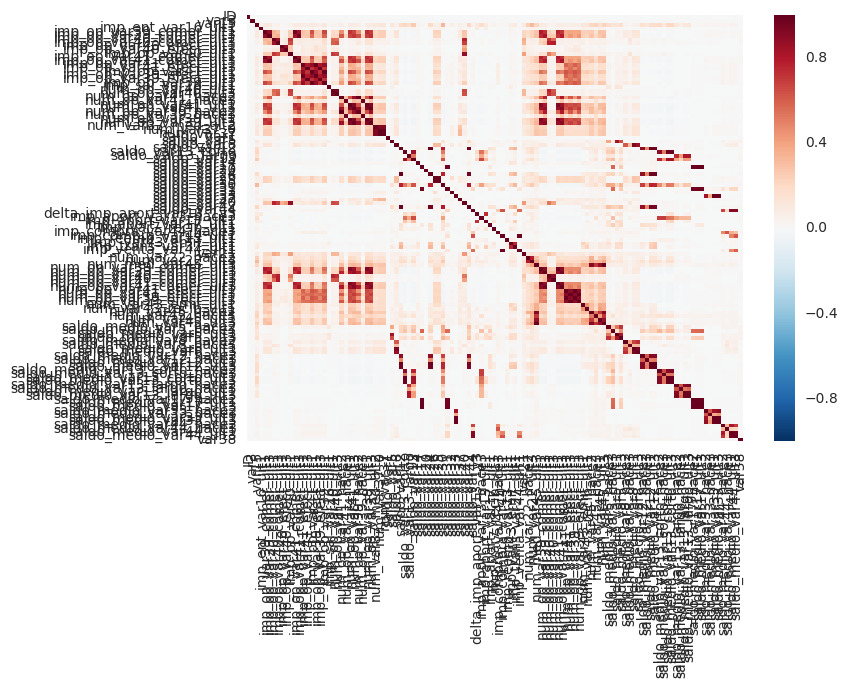

In [113]:
sns.heatmap(corr_matrix, 
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns)
plt.show()

It seems that there are clusters of variables that are highly correlated with each other, especially the ones with highly similar names, such as the ones starting with "imp_" and those starting with "num_"

### Feature selection
Run logistic regression using each individual feature and rank the result.

In [3]:
import statsmodels as sm
muted = pd.read_csv('/Users/yizhao/Documents/Second_capstone/muted_data.csv')

In [114]:
print(muted.shape)
muted.iloc[:5,:5]

(76020, 963)


,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3
ID,,,,,
1,2.0,23,0.0,0.0,0.0
3,2.0,34,0.0,0.0,0.0
4,2.0,23,0.0,0.0,0.0
8,2.0,37,0.0,195.0,195.0
10,2.0,39,0.0,0.0,0.0


In [7]:
no_null = muted.dropna()

print(no_null.shape)

(45908, 964)


In [8]:
less_ft = muted.dropna(axis=1)

print(less_ft.shape)

(76020, 962)


In [34]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.cross_validation import train_test_split, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline


#### Construct a pipeline from feature selection to logistic regression
--> Also optimize the choice of K best features

In [20]:
pipeline = Pipeline([
    ('minmax', MinMaxScaler()),
    ('kBest', SelectKBest(chi2, k = 100)),
    
    #('pca', PCA()),
    ('LG', LogisticRegression())
    #('RF', RandomForestClassifier(n_estimators = 100)),
])
parameters = {
    #'kBest__k':(10,50,100,200,500),
    #'pca__n_components':(10,20,40),
    'LG__C':(0.1,1,10,100)
}

In [21]:

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, 
                           scoring= metrics.make_scorer(metrics.accuracy_score))
#metrics.f1_score

grid_search.fit(less_ft, train_raw.TARGET) # the last column is the target

best_parameters = grid_search.best_estimator_.get_params()
print( best_parameters)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


Process ForkPoolWorker-37:
Process ForkPoolWorker-40:
Process ForkPoolWorker-39:
Process ForkPoolWorker-38:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/yizhao/anaconda3/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/Users/yizhao/anaconda3/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/Users/yizhao/anaconda3/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/Users/yizhao/anaconda3/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/Users/yizhao/anaconda3/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/yizhao/anaconda3/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/yizhao/

KeyboardInterrupt: 

In [38]:
pipe_LG = Pipeline([
    ('minmax', MinMaxScaler()),
    ('kBest', SelectKBest(chi2, k = 100)),
    ('LG', LogisticRegression(C=0.1))
])
seed = 1
kfold = StratifiedKFold(train_raw.TARGET, n_folds=5, random_state=seed) 

results = cross_val_score(pipe_LG,  # run on the pipeline
                          less_ft, train_raw.TARGET,  # review texts and sales rank
                          cv=kfold,  
                          scoring = metrics.make_scorer(metrics.f1_score))
print('chi2 top 100 feature Logistic Regression\n mean f1_score score: \n',
      results.mean())

/Users/yizhao/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


chi2 top 100 feature Logistic Regression
 mean f1_score score: 
 0.0


/Users/yizhao/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [41]:
type(kfold)

sklearn.cross_validation.StratifiedKFold

In [46]:
y.size

76020

In [49]:
X = less_ft
y = train_raw.TARGET

for train_index, test_index in kfold:
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train = X.iloc[train_index, :]
    X_test = X.iloc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
    pipe_LG.fit(X_train, y_train)
    
    print(metrics.f1_score(y_pred= pipe_LG.predict(X_test), 
                           y_true= y_test), '\n')

TRAIN: [37986 37987 37988 ..., 76017 76018 76019] TEST: [    0     1     2 ..., 38644 38694 38754]


/Users/yizhao/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0 

TRAIN: [    0     1     2 ..., 38644 38694 38754] TEST: [37986 37987 37988 ..., 76017 76018 76019]
0.0 



/Users/yizhao/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
